In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import json
from folium import plugins

In [4]:
crime = pd.read_csv("../withzip1.csv")

In [10]:
crime["Location_Desc"].value_counts()

RESIDENCE/HOUSE                               141026
APARTMENT                                     125740
APARTMENT PARKING LOT                         122372
ROAD/STREET/SIDEWALK                           88333
DRIVEWAY                                       59311
OTHER PARKING LOT                              48647
DEPARTMENT/DISCOUNT STORE                      42158
RESTAURANT/CAFETERIA PARKING LOT               34513
OTHER/UNKNOWN                                  26737
COMMERCIAL PARKING LOT/GARAGE                  26287
GROCERY/SUPERMARKET                            22880
STRIP BUSINESS CENTER PARKING LOT              19990
SERVICE/GAS STATION                            17981
RESTAURANT/CAFETERIA                           16607
MISC. BUSINESS (NON-SPECIFIC)                  16264
HOTEL/MOTEL PARKING LOT                        14639
CONVENIENCE STORE                              14413
GROCERY/SUPERMARKET PARKING LOT                12877
BAR/NIGHT CLUB PARKING LOT                    

In [11]:
crime["Police_Division"].value_counts()

Westside Division              145699
North Division                 128402
Central Division               125581
Northeast Division             107227
Southeast Division              89481
Midwest Division                80993
Northwest Division              78772
Southwest Division              77761
Clear Lake Division             59088
South Central Division          56811
South Gessner Division          54144
Eastside Division               27581
Kingwood Division               11752
Airport-IAH Division             4884
Special Operations Division      3376
Airport-Hobby Division            207
Name: Police_Division, dtype: int64

In [12]:
crime["Num_Offenses"].value_counts()

1     1080606
2       11413
3        1758
4         254
5          81
6          47
7          16
8          10
9           5
13          4
10          3
16          3
12          2
17          2
29          1
11          1
33          1
Name: Num_Offenses, dtype: int64

In [13]:
crime["Street_Name"].value_counts()

WESTHEIMER                          29602
GULF                                15444
GESSNER                             15433
NORTH                               13584
RICHMOND                            13524
KATY                                10958
SOUTHWEST                           10816
MAIN                                10043
BISSONNET                           10036
NORTHWEST                            9730
BELLAIRE                             9415
BELLFORT                             8424
FM 1960                              8111
BEECHNUT                             7807
GREENS                               7723
FONDREN                              7672
POST OAK                             7301
TIDWELL                              7001
LITTLE YORK                          6884
BROADWAY                             6754
WEST SAM HOUSTON                     6364
EAST                                 6291
SHEPHERD                             6065
AIRLINE                           

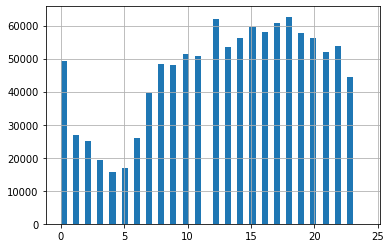

In [23]:
crime["Hour"].hist(bins = 50)

In [5]:
crime["Police_Beat"].value_counts()

19G10    23473
12D10    23128
1A20     22591
6B60     22027
13D20    20751
3B10     20083
18F20    19140
17E10    19100
5F30     18068
18F30    17933
18F40    17841
15E40    17813
1A30     17800
14D20    17373
1A10     16926
20G30    16911
20G50    16891
17E40    16791
2A50     16345
1A50     16129
6B10     15784
18F50    15678
5F40     15174
7C20     15045
9C40     14663
6B30     14157
3B50     13894
2A30     13887
20G10    13758
19G40    13356
         ...  
11H50     2951
24C10     2809
24C50     2681
24C30     2637
24C20     2611
1A40      2532
9C10      2483
12D50     2398
11H40     2274
18F10     2251
21I50     2106
21I10     1272
13D30     1131
24C40     1130
23J50     1011
24C60      746
21I30      587
21I60      430
21I20      316
21I70      171
21I40      108
HCSO        68
OOJ         41
23J40       28
23J30       13
UH3P         6
23J20        3
23J10        2
3B20         1
7C60         1
Name: Police_Beat, Length: 126, dtype: int64

In [8]:
crime.groupby(['Num_Offenses', 'Police_Division']).size()

Num_Offenses  Police_Division            
1             Airport-Hobby Division            196
              Airport-IAH Division             4841
              Central Division               124603
              Clear Lake Division             58447
              Eastside Division               27137
              Kingwood Division               11646
              Midwest Division                80354
              North Division                 126538
              Northeast Division             105247
              Northwest Division              77996
              South Central Division          56217
              South Gessner Division          53364
              Southeast Division              87854
              Southwest Division              76966
              Special Operations Division      3325
              Westside Division              144067
2             Airport-Hobby Division              9
              Airport-IAH Division               30
              Central 

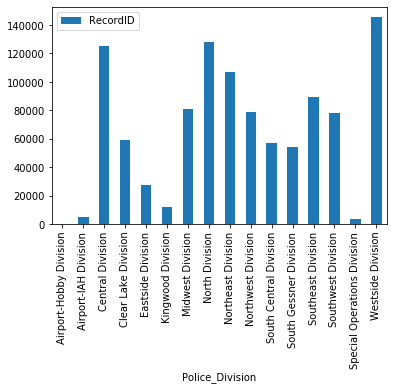

In [16]:
division_counts = crime.groupby("Police_Division").count()
division_counts.plot.bar(y="RecordID")

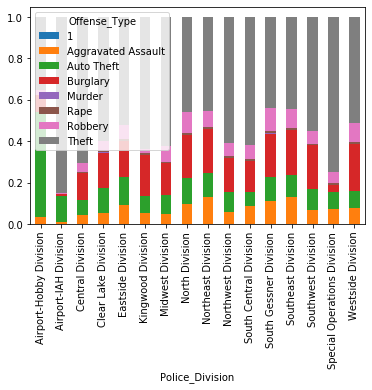

In [6]:
division_counts = crime.groupby(["Police_Division","Offense_Type"])["RecordID"].count().unstack("Offense_Type")
percentage_division_counts = division_counts.div(division_counts.sum(axis=1), axis=0)
percentage_division_counts.plot(kind='bar',stacked=True)

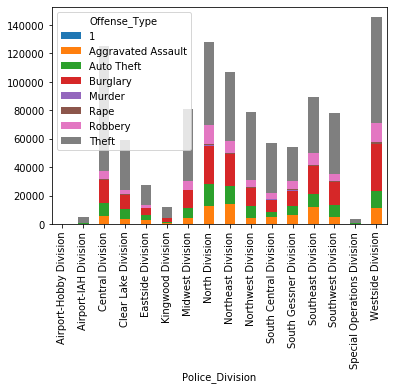

In [7]:
division_counts = crime.groupby(["Police_Division","Offense_Type"])["RecordID"].count().unstack("Offense_Type")
division_counts.plot(kind='bar',stacked=True)

In [16]:
crime["zip_codes"].value_counts()

77036.0    38471
77099.0    24891
77072.0    23760
77092.0    23002
77007.0    22862
77004.0    22578
77063.0    22125
77002.0    20875
77060.0    20721
77074.0    20719
77057.0    20067
77034.0    19931
77082.0    19601
77056.0    19301
77006.0    19074
77009.0    18479
77021.0    18371
77022.0    17967
77042.0    17732
77055.0    17007
77088.0    15804
77077.0    15735
77087.0    15534
77008.0    15495
77026.0    15487
77016.0    15008
77061.0    14632
77096.0    14420
77076.0    14399
77035.0    14286
           ...  
77504.0      581
77094.0      553
77050.0      534
77587.0      337
77090.0      333
77066.0      300
77365.0      250
77039.0      231
77086.0      211
77401.0      208
77498.0      186
77069.0      164
77073.0      120
77449.0      101
77095.0       73
77373.0       70
77545.0       63
77532.0       54
77068.0       50
77065.0       47
77506.0       18
77450.0       12
77357.0       11
77429.0        6
77494.0        5
77375.0        3
77433.0        2
77530.0       

In [56]:
grouped_crime_data = crime.groupby("zip_codes")
crime_by_zipcode = pd.DataFrame(grouped_crime_data.size().reset_index(name = "crime_frequency"))
crime_by_zipcode["ZCTA5CE10"] = crime_by_zipcode["zip_codes"].astype(int).astype(str)
houston_map = folium.Map(location=[29.749907,-95.358421],zoom_start=9)
houston_map.choropleth(
    geo_data="../houston_zipcodes.geojson",
    name="choropleth",
    data=crime_by_zipcode,
    columns=["ZCTA5CE10","crime_frequency"],
    key_on="feature.properties.ZCTA5CE10",
    fill_color="YlGn",
    fill_opacity="0.7",
    line_opacity="0.2",
    legend_name="Crime Frequency"
)
houston_map.save("crime_data.html")

In [3]:
from sklearn.preprocessing import OneHotEncoder
crime = crime.dropna()
crime2 = crime[["Offense_Type", "Police_Division"]]
categorical_features = ["Offense_Type", "Police_Division"]
# Create an Encoder for vectorizing our categorical features.
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
# Constructs a matrix of 0s and 1s which encode our occupation and work class
X_categorical = enc.fit_transform(crime2[categorical_features])
enc.categories_

[array(['1', 'Aggravated Assault', 'Auto Theft', 'Burglary', 'Murder',
        'Rape', 'Robbery', 'Theft'], dtype=object),
 array(['Airport-IAH Division', 'Central Division', 'Clear Lake Division',
        'Eastside Division', 'Kingwood Division', 'Midwest Division',
        'North Division', 'Northeast Division', 'Northwest Division',
        'South Central Division', 'South Gessner Division',
        'Southeast Division', 'Southwest Division',
        'Special Operations Division', 'Westside Division'], dtype=object)]

In [5]:
X_numerical = crime2.drop(columns=categorical_features).values.astype(int)
X = np.hstack((X_numerical, X_categorical))
X_numerical.shape, X_categorical.shape, X.shape

((17573, 0), (17573, 23), (17573, 23))

In [6]:
from sklearn.model_selection import train_test_split

# percent of full dataset to use for test set.  important to restrict 
test_size = 0.2
y = crime["Hour"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="lbfgs")
clf.fit(X_train, y_train)

C:\Users\Srivinay Tummarakota\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

y_pred = clf.predict(X_test)
{
    "accuracy_score": accuracy_score(y_test, y_pred)
}

{'accuracy_score': 0.07197724039829304}